## Data Analysis using BulkLMM - BXD Longevity Study

In [1]:
using CSV, DelimitedFiles, DataFrames, Missings, XLSX
using LinearAlgebra, Statistics, Optim
using Random, Distributions, LoopVectorization
# using GeneNetworkAPI, Downloads
using BenchmarkTools

In [2]:
using Plots

In [3]:
local_path = "../../BulkLMM.jl/src";

## Load processed_data:

### By individuals:

In [4]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [5]:
BXD_pheno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 32445 livear proteome.

In [6]:
println(size(BXD_pheno_ind_summary_df)) 
BXD_pheno_ind_summary_df[1:10, 1:10]

(248, 32448)


Row,Sample,Strain,Strain_num,P42209_DESGLNRK_2,P42209_GLRPLDVAFLR_3,Q99M02_VGDPVYR_2,Q99M02_VWIYPIK_2,Q99M02_LCDPSVK_2,Q99M02_CVLTTVDPDTGIIDR_2,Q99M02_LVQFDTSMK_2
,String7,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,H1009,BXD9,9,11.349,11.534,17.587,17.517,17.309,16.574,16.323
2,H0370,BXD9,9,11.249,12.735,17.427,17.325,17.252,16.685,16.021
3,H2577,BXD9,9,12.415,10.487,17.89,17.488,17.594,16.731,16.208
4,H0365,BXD9,9,11.374,10.674,17.714,17.401,17.381,16.621,16.337
5,H1333,BXD13,13,11.687,11.524,17.362,17.367,17.071,16.465,15.97
6,H2259,BXD24,24,11.837,11.715,17.57,17.792,17.505,16.894,16.277
7,H1792,BXD24,24,11.563,11.434,17.789,17.847,17.416,17.042,16.292
8,H1791,BXD24,24,12.5,12.273,17.944,17.833,17.63,16.862,16.3
9,H1541,BXD24,24,11.815,11.564,17.794,17.759,17.456,16.878,16.377


In [7]:
BXD_geno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 7321 markers.

In [8]:
println(size(BXD_geno_ind_summary_df)) 
BXD_geno_ind_summary_df[1:10, 1:10]

(248, 7324)


Row,Sample,Strain,Strain_num,rs31443144,rs6269442,rs32285189,rs258367496,rs32430919,rs36251697,rs30658298
,String7,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,H1009,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,H0370,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H2577,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,H0365,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,H1333,BXD13,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,H2259,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,H1792,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,H1791,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,H1541,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### By strains:

In [9]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [10]:
BXD_pheno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_strain_means_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 32445 liver proteome.

In [11]:
println(size(BXD_pheno_strains_summary_df)) 
BXD_pheno_strains_summary_df[1:10, 1:10]

(50, 32447)


Row,Strain,Number of Samples,P42209_DESGLNRK_2,P42209_GLRPLDVAFLR_3,Q99M02_VGDPVYR_2,Q99M02_VWIYPIK_2,Q99M02_LCDPSVK_2,Q99M02_CVLTTVDPDTGIIDR_2,Q99M02_LVQFDTSMK_2,Q99M02_QLQQVGTVSK_2
,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BXD9,4,11.5968,11.3575,17.6545,17.4327,17.384,16.6528,16.2222,16.3227
2,BXD13,1,11.687,11.524,17.362,17.367,17.071,16.465,15.97,15.98
3,BXD24,5,12.0778,11.7458,17.7926,17.8152,17.5168,16.9196,16.3012,16.4304
4,BXD27,3,11.717,11.149,17.336,17.3143,17.165,16.5283,15.9407,16.002
5,BXD29,11,11.735,11.3496,17.4583,17.3877,17.2431,16.4945,16.0869,16.1075
6,BXD32,8,11.6266,11.554,17.8254,17.7716,17.4639,16.9029,16.434,16.425
7,BXD34,13,11.7491,11.9135,17.6108,17.5974,17.2988,16.7761,16.3147,16.2926
8,BXD39,5,11.9158,11.719,17.395,17.385,17.157,16.5226,16.179,16.0594
9,BXD40,8,11.8651,11.6817,17.5986,17.6386,17.3861,16.6824,16.2855,16.2523


In [12]:
BXD_geno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_strains_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 7321 markers.

In [13]:
println(size(BXD_geno_strains_summary_df)) 
BXD_geno_strains_summary_df[1:10, 1:10]

(50, 7322)


Row,Strain,rs31443144,rs6269442,rs32285189,rs258367496,rs32430919,rs36251697,rs30658298,rs51852623,rs31879829
,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BXD9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BXD13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BXD24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BXD27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,BXD29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,BXD32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,BXD34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,BXD39,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,BXD40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load functions:

In [14]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [15]:
include(joinpath(local_path, "kinship.jl"));
include(joinpath(local_path, "util.jl"));
include(joinpath(local_path, "wls.jl"));
include(joinpath(local_path, "lmm.jl"));
include(joinpath(local_path, "gridbrent.jl"));
include(joinpath(local_path, "transform_helpers.jl"));
include(joinpath(local_path, "scan.jl"));
include(joinpath(local_path, "bulkscan_helpers.jl"));
include(joinpath(local_path, "bulkscan.jl"));
include(joinpath(local_path, "readData.jl"));
include(joinpath(local_path, "../plot_utils/visuals_utils.jl"));
include(joinpath(local_path, "analysis_helpers/single_trait_analysis.jl"));
include("../../BigRiver_util_code/src/kinship_utils.jl");

## Objectives

- gemma one trait, ind and strains

- scan_alt one trait, ind and strains

- scan_null one trait, ind and strains

- bulkscan_grid (null), all traits, ...

- data structure for all traits results...

- Heatmap grids_taken, compare on strain means and individuals

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

- Loglikelihood by h2_grid plot, strain means v.s. individuals

- Report fixed effects:

- Adjusting difference in the number of samples across strains

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

## Run BulkLMM.jl:

### Calculate kinship:

First, calculate the kinship matrix of relatedness among the strains (50-by-50):

In [16]:
geno_strains = Matrix{Float64}(BXD_geno_strains_summary_df[:, 2:end]);

In [17]:
kinship_strains = calcKinship(geno_strains);

Then, construct the kinship matrix of relatedness among the individuals based on which strain they are from:

In [18]:
BXD_geno_ind_summary_df.Strain_num = Vector{Int64}(BXD_geno_ind_summary_df.Strain_num);

In [19]:
@time kinship_ind_from_strains = calcKinship2(kinship_strains, BXD_geno_ind_summary_df.Strain_num);

  0.078360 seconds (103.25 k allocations: 5.983 MiB, 96.13% compilation time)


### Single-trait genome scans:

To see single trait genome scan results, we take the 29437-th livear proteomic as the single trait to run analysis:  

In [20]:
lp_names = names(BXD_pheno_ind_summary_df)[4:end];

In [21]:
lp_id = 29437;
lp_names[lp_id]

"Q9Z2I8_SSGLPITSAVDLEDAAK_3"

In [22]:
prior = [1.0, 0.0];

#### For individual liver proteome

In [23]:
geno_ind = Matrix{Float64}(BXD_geno_ind_summary_df[:, 4:end]);

In [24]:
lp_ind_Y = Matrix{Float64}(BXD_pheno_ind_summary_df[:, 4:end]);
lp_ind_y = reshape(lp_ind_Y[:, lp_id], :, 1);

In [25]:
lpst_ind_Y = colStandardize(lp_ind_Y);
lpst_ind_y = reshape(lpst_ind_Y[:, lp_id], :, 1);

In [26]:
@time scan_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                              prior_variance = 1.0, prior_sample_size = 0.1);

  0.725176 seconds (731.68 k allocations: 175.362 MiB, 12.93% gc time, 79.06% compilation time)


In [27]:
@time scan_results_ind_alt = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                  assumption = "alt", 
                                  prior_variance = prior[1], prior_sample_size = prior[2]);

 13.294940 seconds (11.82 M allocations: 14.369 GiB, 7.71% gc time, 0.25% compilation time)


In [28]:
@time scan_perms_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                    prior_variance = prior[1], prior_sample_size = prior[2],
                                    permutation_test = true, nperms = 1000, original = true);

  1.008721 seconds (2.06 M allocations: 269.178 MiB, 2.77% gc time, 87.67% compilation time)


In [29]:
single_results_ind = DataFrame(hcat(scan_results_ind.lod, scan_results_ind_alt.lod, scan_perms_results_ind[:, 1]), ["scan_null", "scan_alt", "scan_perms.original"]);

In [30]:
single_results_ind[1:6, :]

Row,scan_null,scan_alt,scan_perms.original
,Float64,Float64,Float64
1,0.44861,0.44861,0.44861
2,0.44861,0.44861,0.44861
3,0.44861,0.44861,0.44861
4,0.44861,0.44861,0.44861
5,0.44861,0.44861,0.44861
6,0.44861,0.44861,0.44861


#### For liver proteome means by strains

In [26]:
lp_strains_Y = Matrix{Float64}(BXD_pheno_strains_summary_df[:, 3:end]);
lp_strains_y = reshape(lp_strains_Y[:, lp_id], :, 1);

In [27]:
lpst_strains_Y = colStandardize(lp_strains_Y);
lpst_strains_y = reshape(lpst_strains_Y[:, lp_id], :, 1);

In [33]:
@time scan_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains; 
                                  prior_variance = prior[1], prior_sample_size = prior[2],
                                  optim_interval = 4);

  0.080775 seconds (206.70 k allocations: 40.364 MiB, 43.65% compilation time)


In [34]:
@time scan_results_strains_alt = scan(lpst_strains_y, geno_strains, kinship_strains;
                                      assumption = "alt",
                                      prior_variance = prior[1], prior_sample_size = prior[2]);

  2.880550 seconds (6.73 M allocations: 2.055 GiB, 19.07% gc time)


In [35]:
@time scan_perms_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains;
                                        permutation_test = true, nperms = 1000, original = true, 
                                        prior_variance = prior[1], prior_sample_size = prior[2]);

  0.112563 seconds (215.14 k allocations: 86.077 MiB, 26.47% gc time, 59.86% compilation time)


In [36]:
single_results_strains = DataFrame(hcat(scan_results_strains.lod, scan_results_strains_alt.lod, scan_perms_results_strains[:, 1]), ["scan_null", "scan_alt", "scan_perms.original"]);

In [37]:
single_results_strains[1:6, :]

Row,scan_null,scan_alt,scan_perms.original
,Float64,Float64,Float64
1,0.387771,0.387771,0.387771
2,0.387771,0.387771,0.387771
3,0.387771,0.387771,0.387771
4,0.387771,0.387771,0.387771
5,0.387771,0.387771,0.387771
6,0.387771,0.387771,0.387771


### Multiple-trait genome scans:

In [28]:
BLAS.set_num_threads(Threads.nthreads())

In [29]:
BLAS.get_num_threads()

16

In [30]:
grid_list = collect(0.0:0.05:0.95);
# grid_list = collect(0.0:0.01:0.99);

#### For individual liver proteome

In [ ]:
size(lpst_ind_Y)

In [ ]:
size(lpst_strains_Y)

In [ ]:
Threads.nthreads()

In [ ]:
@time bulkscan_results_ind_null = bulkscan_null(lp_ind_Y, geno_ind, kinship_ind_from_strains; nb = Threads.nthreads(),
                                                prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1);

In [ ]:
BLAS.set_num_threads(Threads.nthreads())

In [ ]:
@time bulkscan_results_ind_alt_grid = bulkscan_alt_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

In [ ]:
@time bulkscan_results_ind_null_grid = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

#### For liver proteome means by strains

In [ ]:
@time bulkscan_results_strains_null = bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains; nb = Threads.nthreads(),
                                                    prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1);

In [ ]:
BLAS.set_num_threads(Threads.nthreads())

In [ ]:
@time bulkscan_results_strains_alt_grid = bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list);

In [ ]:
@time bulkscan_results_strains_null_grid = bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list;
                                                              prior_variance = 1.0, prior_sample_size = 0.0);

In [ ]:
pwd()

### Peformance check:

#### Individual data:
- n = 248
- m = 32445
- p = 7321

In [40]:
size(lpst_ind_Y)

(248, 32445)

In [41]:
size(geno_ind)

(248, 7321)

In [42]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains)

BenchmarkTools.Trial: 31 samples with 1 evaluation.
 Range (min … max):  137.718 ms … 295.167 ms  ┊ GC (min … max): 0.00% … 12.62%
 Time  (median):     153.051 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   165.246 ms ±  34.361 ms  ┊ GC (mean ± σ):  8.15% ±  9.55%

  █    ▁                                                         
  █▄▄▁▆█▄▄▁▆▄▄▄▁▄▁▄▁▁▁▄▁▁▁▄▁▄▁▁▁▄▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▁
  138 ms           Histogram: frequency by time          295 ms <

 Memory estimate: 136.22 MiB, allocs estimate: 82175.

In [43]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 34 samples with 1 evaluation.
 Range (min … max):  137.078 ms … 185.899 ms  ┊ GC (min … max): 0.00% … 9.05%
 Time  (median):     151.067 ms               ┊ GC (median):    4.71%
 Time  (mean ± σ):   147.267 ms ±   9.947 ms  ┊ GC (mean ± σ):  5.02% ± 4.88%

  ▄▃                █                                            
  ██▇▁▁▄▁▁▁▁▁▁▁▁▁▁▄▇█▇▄▁▄▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▁
  137 ms           Histogram: frequency by time          186 ms <

 Memory estimate: 136.25 MiB, allocs estimate: 82196.

In [44]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt")

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 13.118 s (6.90% GC) to evaluate,
 with a memory estimate of 14.36 GiB, over 11700339 allocations.

In [45]:
@benchmark scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 13.560 s (6.49% GC) to evaluate,
 with a memory estimate of 14.36 GiB, over 11699184 allocations.

In [46]:
BLAS.get_num_threads()

16

In [69]:
@time bulkscan_null(lpst_ind_Y, geno_ind, kinship_ind_from_strains,
                    prior_variance = 1.0, prior_sample_size = 0.1);

158.591825 seconds (2.60 G allocations: 1.813 TiB, 18.45% gc time)


In [80]:
grid_perf = collect(0.0:0.05:0.95);

In [81]:
@benchmark bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_perf;
                              prior_variance = 1.0, prior_sample_size = 0.1)

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m./[39m[90m[4mthreadingconstructs.jl:51[24m[39m[90m [inlined][39m
     [2] [0m[1mthreaded_map![22m[0m[1m([22m[90mf[39m::[0mFunction, [90mM[39m::[0mMatrix[90m{Float64}[39m, [90margs[39m::[0mInt64; [90mdims[39m::[0mInt64[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m~/git/BulkLMM.jl/src/[39m[90m[4mbulkscan_helpers.jl:94[24m[39m
     [3] [0m[1mweighted_liteqtl[22m[0m[1m([22m[90mY0[39m::[0mMatrix[90m{Float64}[39m, [90mX0[39m::[0mMatrix[90m{Float64}[39m, [90mlambda0[39m::[0mVector[90m{Float64}[39m, [90mhsq[39m::[0mFloat64; [90mnum_of_covar[39m::[0mInt64, [90mdims[39m::[0mInt64[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m~/git/BulkLMM.jl/src/[39m[90m[4mbulkscan_helpers.jl:200[24m[39m
     [4] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/git/BulkLMM.jl/src/[39m[90m[4mbulkscan_helpers.jl:286[24m[39m[90m [inlined][39m
     [5] [0m[1m(::var"#148#threadsfor_fun#44"{Vector{Matrix{Float64}}, Vector{Vector{Bool}}, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Matrix{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [6] [0m[1m(::var"#148#threadsfor_fun#44"{Vector{Matrix{Float64}}, Vector{Vector{Bool}}, Vector{Float64}, Vector{Float64}, Matrix{Float64}, Matrix{Float64}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[35mMain[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [49]:
@benchmark bulkscan_alt_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_perf)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 22.824 s (3.32% GC) to evaluate,
 with a memory estimate of 41.84 GiB, over 8691544 allocations.

#### Strain mean data:
- n = 50
- m = 32445
- p = 7321

In [51]:
size(lpst_strains_Y)

(50, 32445)

In [50]:
size(geno_strains)

(50, 7321)

In [52]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains)

BenchmarkTools.Trial: 95 samples with 1 evaluation.
 Range (min … max):  39.550 ms … 241.791 ms  ┊ GC (min … max): 0.00% … 79.77%
 Time  (median):     48.669 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   52.642 ms ±  27.347 ms  ┊ GC (mean ± σ):  7.67% ± 11.64%

    █▅                                                          
  ▄▁██▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▁
  39.5 ms       Histogram: log(frequency) by time       234 ms <

 Memory estimate: 32.42 MiB, allocs estimate: 81398.

In [53]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 94 samples with 1 evaluation.
 Range (min … max):  45.709 ms … 229.799 ms  ┊ GC (min … max): 0.00% … 83.15%
 Time  (median):     49.179 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   53.652 ms ±  25.903 ms  ┊ GC (mean ± σ):  7.42% ± 11.93%

  █▇                                                            
  ███▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂ ▁
  45.7 ms         Histogram: frequency by time          225 ms <

 Memory estimate: 32.32 MiB, allocs estimate: 81020.

In [54]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt")

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  2.678 s …   2.808 s  ┊ GC (min … max): 5.15% … 9.90%
 Time  (median):     2.743 s              ┊ GC (median):    7.58%
 Time  (mean ± σ):   2.743 s ± 91.680 ms  ┊ GC (mean ± σ):  7.58% ± 3.36%

  █                                                       █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  2.68 s         Histogram: frequency by time        2.81 s <

 Memory estimate: 2.05 GiB, allocs estimate: 6725943.

In [55]:
@benchmark scan(lpst_strains_y, geno_strains, kinship_strains;
                assumption = "alt", 
                prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 3 samples with 1 evaluation.
 Range (min … max):  1.667 s …  1.675 s  ┊ GC (min … max): 8.24% … 8.60%
 Time  (median):     1.668 s             ┊ GC (median):    8.29%
 Time  (mean ± σ):   1.670 s ± 4.477 ms  ┊ GC (mean ± σ):  8.38% ± 0.20%

  █       █                                              █  
  █▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.67 s        Histogram: frequency by time        1.67 s <

 Memory estimate: 1.23 GiB, allocs estimate: 4082862.

In [65]:
BLAS.get_num_threads()

1

In [68]:
@time bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains,
                    prior_variance = 1.0, prior_sample_size = 0.1);

 59.414409 seconds (2.61 G allocations: 434.448 GiB, 40.69% gc time)


In [56]:
grid_perf = collect(0.0:0.05:0.95);

In [57]:
@benchmark bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf;
                              prior_variance = 1.0, prior_sample_size = 0.1)

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  4.319 s …   4.427 s  ┊ GC (min … max): 3.48% … 3.22%
 Time  (median):     4.373 s              ┊ GC (median):    3.35%
 Time  (mean ± σ):   4.373 s ± 75.882 ms  ┊ GC (mean ± σ):  3.35% ± 0.18%

  █                                                       █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  4.32 s         Histogram: frequency by time        4.43 s <

 Memory estimate: 5.29 GiB, allocs estimate: 9473686.

In [58]:
@benchmark bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_perf)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 14.257 s (4.92% GC) to evaluate,
 with a memory estimate of 36.86 GiB, over 8691487 allocations.

In [42]:
grid_fine = collect(0.00:0.01:0.99);

In [43]:
@time test_alt_grid = bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_fine);

 80.951376 seconds (45.34 M allocations: 191.402 GiB, 1.87% gc time, 1.10% compilation time)


In [44]:
@time test_alt_one_trait = scan(lpst_strains_y, geno_strains, kinship_strains;
                                assumption = "alt", optim_interval = 4);

 10.479788 seconds (27.38 M allocations: 8.464 GiB, 6.78% gc time)


In [48]:
findmax(abs.(test_alt_one_trait.lod .- test_alt_grid[1][:, lp_id]))

(0.1396593128848893, 1124)

In [49]:
test_alt_grid[1][1124, lp_id]

1.9076911920915123

In [60]:
findall(test_alt_grid[2] .> 0.0)

CartesianIndex{2}[]

In [53]:
test_alt_one_trait.h2_each_marker

7321-element Vector{Float64}:
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 ⋮
 3.6518127143473113e-16
 3.6518127143473113e-16
 3.6518127143473113e-16
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871
 0.9999999831800871

In [55]:
test_alt_one_trait.lod

7321-element Vector{Float64}:
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.3877714781553215
 0.16034649816110755
 ⋮
 0.34527623483010667
 0.34527623483010667
 0.34527623483010667
 0.027585330847610865
 0.23282638549027487
 0.23282638549027487
 0.15291510380768134
 0.014215536213185248
 0.15291510380768134
 0.014215536213185248
 0.14223017364495535
 0.14223017364495535

In [54]:
test_alt_grid[1][:, lp_id]

7321-element Vector{Float64}:
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.3842559232200484
 0.15768543241608898
 ⋮
 0.416519492663195
 0.416519492663195
 0.416519492663195
 0.07389030380463844
 0.2853121601401946
 0.2853121601401946
 0.16737924236167478
 0.02589601537873198
 0.16737924236167478
 0.02589601537873198
 0.15081230591462266
 0.15081230591462266

In [84]:
@time test_null_grid = bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_fine);

  9.820028 seconds (43.91 M allocations: 11.816 GiB, 10.40% gc time)


In [32]:
@time test_null_one_trait = scan(lpst_strains_y, geno_strains, kinship_strains;
                                assumption = "alt", optim_interval = 10);

 22.683089 seconds (57.26 M allocations: 17.732 GiB, 8.97% gc time)


In [33]:
findmax(abs.(test_null_one_trait.lod .- test_null_grid.L[:, lp_id]))

LoadError: UndefVarError: test_null_grid not defined

In [88]:
hcat(test_null_one_trait.lod[6941], test_null_grid.L[6941, lp_id])

1×2 Matrix{Float64}:
 1.0676  1.09977

In [89]:
test_null_grid.h2_null_list[lp_id]

0.99

In [34]:
gemma_results_strains = readdlm("output/results_strains.txt.assoc.txt", '\t');
gemma_results_ind = readdlm("output/results_ind.txt.assoc.txt", '\t');

In [35]:
gemma_strains = gemma_results_strains[2:end, 10] |> x -> Array{Float64}(x);
gemma_ind = gemma_results_ind[2:end, 10] |> x -> Array{Float64}(x);

In [36]:
function p2lod(pval::Float64, df::Int64)
    
    lrs = invlogcdf(Chisq(df), log(1-pval))
    lod = lrs/(2*log(10))
    
    # return lrs
    return lod

end

p2lod (generic function with 1 method)

In [37]:
gemma_strains_lod = p2lod.(gemma_strains, 1);
gemma_ind_lod = p2lod.(gemma_ind, 1);

In [41]:
hcat(gemma_strains_lod, test_alt_one_trait.lod, test_null_grid[:, lp_id])

LoadError: UndefVarError: test_null_grid not defined

In [97]:
findmax(abs.(gemma_strains_lod .- test_alt_one_trait.lod))

(0.995205565940622, 130)

In [101]:
hcat(gemma_strains_lod[130], test_alt_one_trait.lod[130], test_alt_grid[130, lp_id])

1×3 Matrix{Float64}:
 0.531161  1.52637  1.59624

In [99]:
findmax(abs.(gemma_strains_lod .- test_alt_grid[:, lp_id]))

(1.06508190697209, 130)

In [100]:
mean(gemma_strains_lod .- test_alt_one_trait.lod .> 0.0)

0.08359513727632838

In [39]:
@time test_alt_one_trait = scan(lpst_strains_y, geno_strains, kinship_strains;
                                assumption = "alt", optim_interval = 1);

  2.701044 seconds (6.73 M allocations: 2.055 GiB, 10.16% gc time)


In [103]:
findmax(abs.(gemma_strains_lod .- test_alt_one_trait1.lod))

(0.9952055617676439, 130)

In [122]:
test = readdlm("output/results_strains.txt.assoc.txt", '\t')[2:end, :];
test[130, :][9]

1.0e6

In [121]:
p2lod(0.1178182, 1)

0.5311611707846458

In [124]:
test[130, :][9]/(1+test[130, :][9])

0.999999000001

In [125]:
test_alt_one_trait.h2_each_marker[130]

5.8722588511011e-16

In [132]:
test_alt_one_trait.h2_each_marker[130]

5.8722588511011e-16

In [128]:
grid_plot = collect(0:999).*0.001;

Loglik plot: 


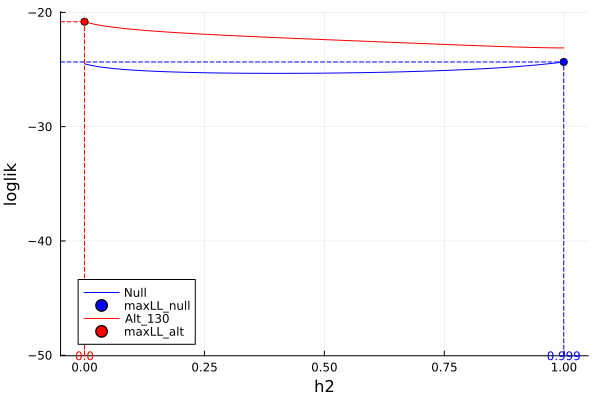

In [131]:
scan(lpst_strains_y, geno_strains, kinship_strains;
     assumption = "alt", optim_interval = 1,
     plot_loglik = true, markerID = 130, h2_grid = grid_plot, y_lims = [-50.0, -20.0]);

In [135]:
test_null_one_trait.h2_each_marker[130]

6.103985049420214e-16

In [137]:
test[130, 8]

56.23045

In [62]:
@time test_alt_one_trait_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                assumption = "alt", optim_interval = 4);

 38.588290 seconds (27.60 M allocations: 34.050 GiB, 9.53% gc time)


In [66]:
hcat(test_alt_one_trait_ind.lod, test_alt_one_trait_ind.h2_each_marker)

7321×2 Matrix{Float64}:
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.44861    5.87226e-16
 0.0272577  9.50151e-16
 ⋮          
 0.325853   3.62926e-16
 0.325853   3.62926e-16
 0.325853   3.62926e-16
 0.049511   3.65181e-16
 0.338767   3.60834e-16
 0.338767   3.60834e-16
 0.163592   3.62926e-16
 0.0956353  5.90876e-16
 0.163592   3.62926e-16
 0.0956353  5.90876e-16
 0.161577   5.87226e-16
 0.161577   5.87226e-16

In [71]:
@time test_alt_ind = bulkscan_alt_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_fine);

141.641255 seconds (43.47 M allocations: 215.921 GiB, 19.86% gc time)


In [79]:
any(h2_list .> 0.0)

false

In [76]:
L = test_alt_ind[1];
h2_list = test_alt_ind[2];

In [78]:
hcat(L[:, lp_id], h2_list[:, lp_id])

7321×2 Matrix{Float64}:
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.44861    0.0
 0.0754863  0.0
 ⋮          
 0.325853   0.0
 0.325853   0.0
 0.325853   0.0
 0.049511   0.0
 0.338767   0.0
 0.338767   0.0
 0.163592   0.0
 0.0956353  0.0
 0.163592   0.0
 0.0956353  0.0
 0.161577   0.0
 0.161577   0.0

In [83]:
@time test_null_ind = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_fine;
                                   prior_variance = 1.0, prior_sample_size = 0.0);

 39.882711 seconds (46.80 M allocations: 41.700 GiB, 60.73% gc time)


In [84]:
findall(test_null_ind.h2_null_list .> 0.0)

15203-element Vector{Int64}:
     1
     3
     4
     5
     6
     7
     8
     9
    10
    13
    14
    16
    17
     ⋮
 32410
 32411
 32412
 32420
 32421
 32425
 32426
 32428
 32429
 32437
 32441
 32443

In [86]:
findmax(abs.(test_null_ind.L .- L))

(95.08909700114346, CartesianIndex(7001, 14098))

In [ ]:
test_null_ind.L[7001, 14098]